In [36]:
import pandas as pd

# 데이터 로드 및 준비
data = pd.read_excel('/content/sample_data/시계열분석_복합SCFI_2017.xlsx')

In [37]:
data.head()

,YYYYMM,SCFI_C
0,2014-01,1174.866
1,2014-02,1069.362
2,2014-03,969.145
3,2014-04,1078.462
4,2014-05,1137.112


# 도표 17-2. 시계열 데이터 이해 및 탐색에 대한 답변

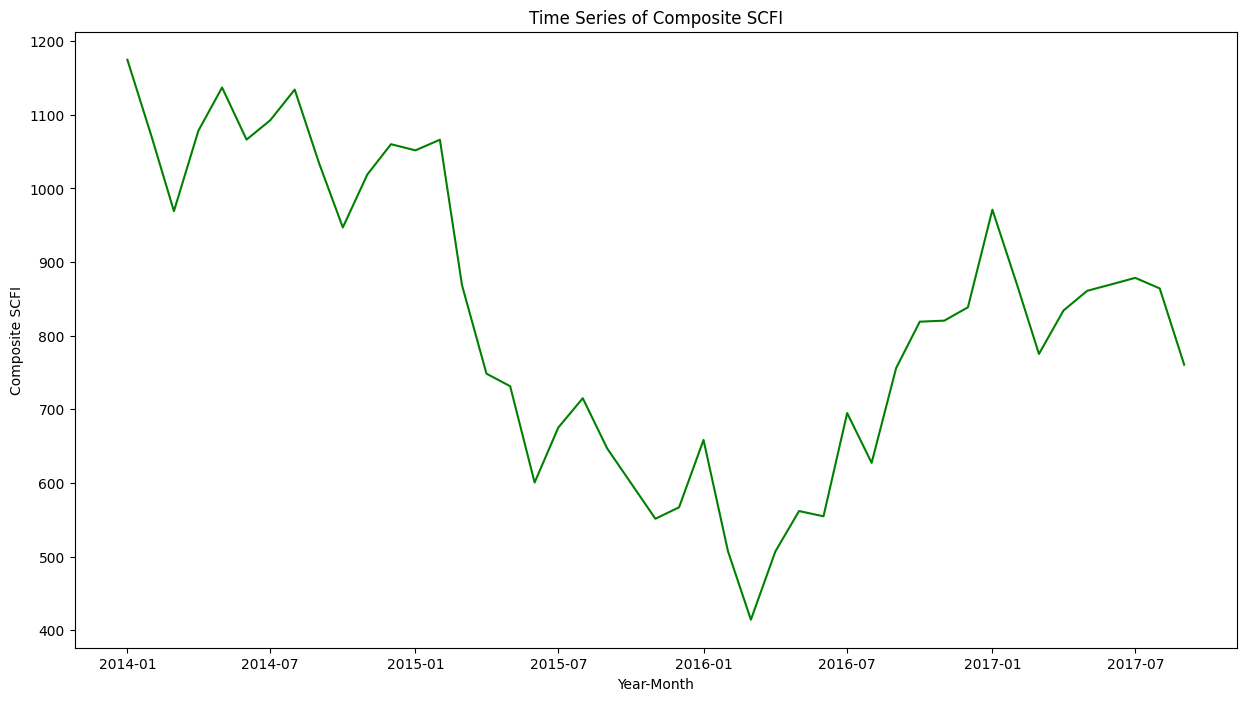

,SCFI_C
count,45.000000
mean,823.260244
std,203.193558
min,414.135000
25%,658.352000
50%,834.060000
75%,1018.875000
max,1174.866000


In [38]:
import matplotlib.pyplot as plt


# 날짜 형식으로 변환 및 인덱스 설정
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')
data.sort_values(by='YYYYMM', inplace=True)  # ChatGTP 누락 작성 필요
data.set_index('YYYYMM', inplace=True)

plt.figure(figsize=(15, 8))
plt.plot(data.index, data['SCFI_C'], color='green')
plt.xlabel('Year-Month')
plt.ylabel('Composite SCFI')
plt.title('Time Series of Composite SCFI')
plt.show()

data.describe()

In [39]:
data.head()

,SCFI_C
YYYYMM,
2014-01-01,1174.866
2014-02-01,1069.362
2014-03-01,969.145
2014-04-01,1078.462
2014-05-01,1137.112


# 도표 17-3. 시계열 데이터의 구성요소분석 답변

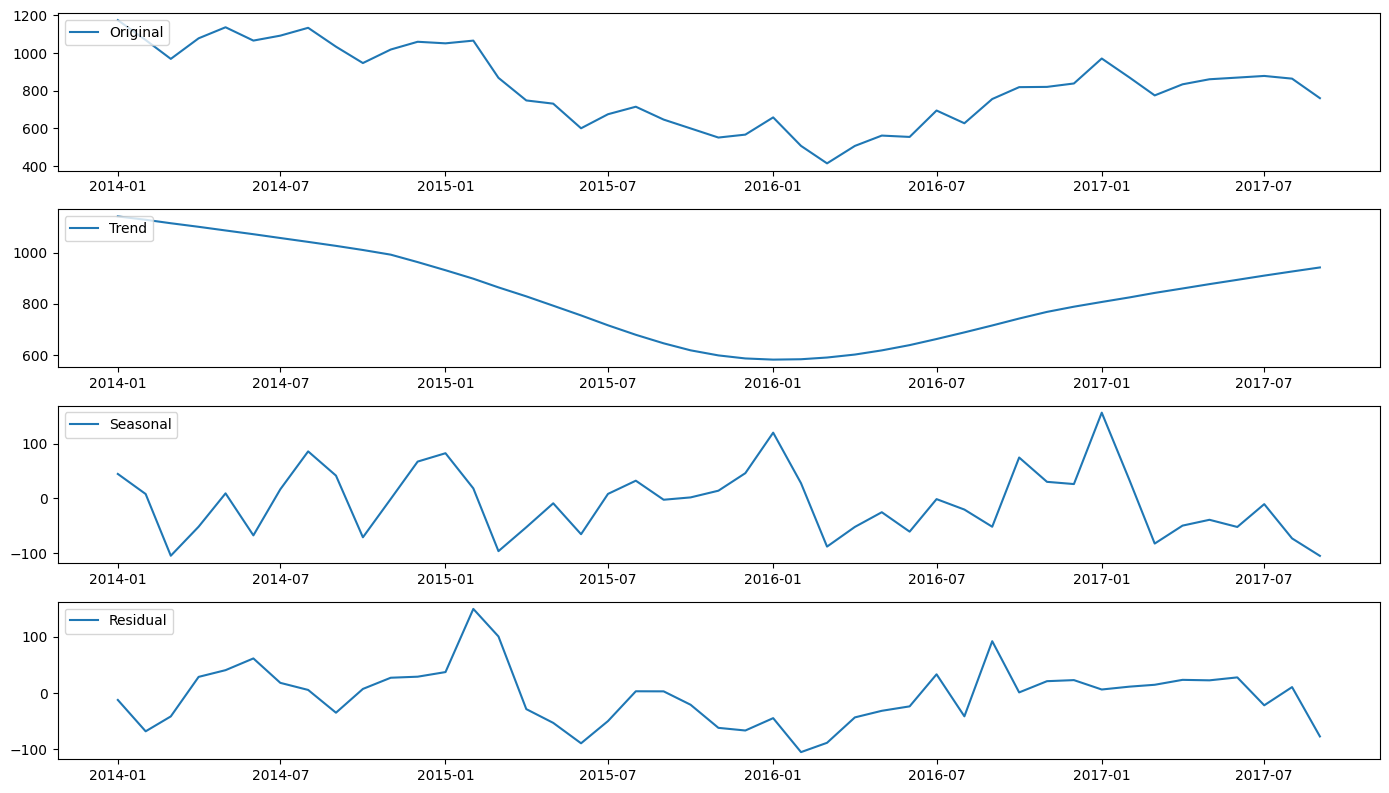

In [40]:
from statsmodels.tsa.seasonal import STL

# STL 분해 실행
stl = STL(data['SCFI_C'], seasonal=13)
result = stl.fit()

# 분해된 구성 요소 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# 각 구성 요소 시각화
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(data['SCFI_C'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 도표 17-4. 순환변동 분석 결과

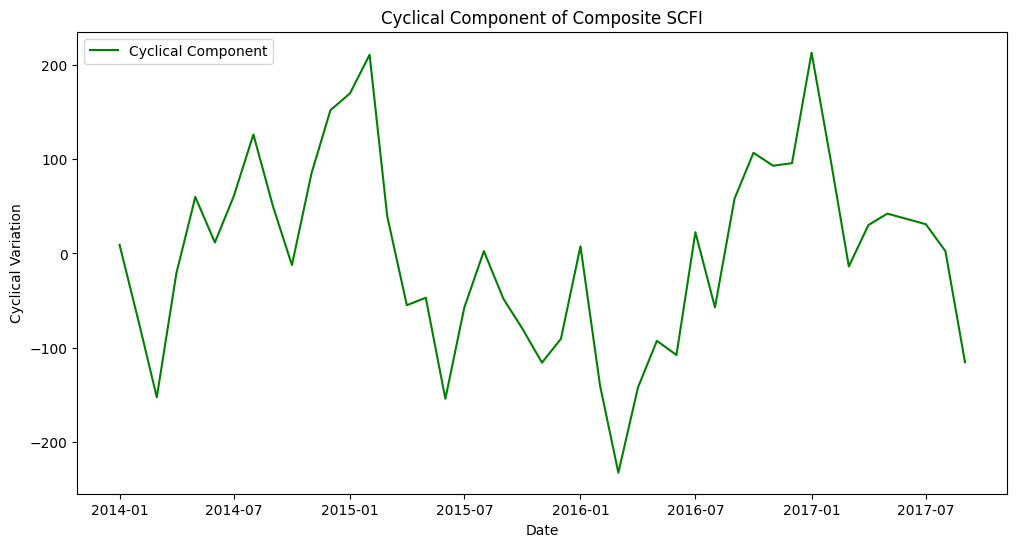

In [41]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Hodrick-Prescott 필터 적용
cycle, trend = hpfilter(data['SCFI_C'], lamb=1600)

# 순환변동 그래프
plt.figure(figsize=(12, 6))
plt.plot(cycle, label='Cyclical Component', color='green')
plt.title('Cyclical Component of Composite SCFI')
plt.xlabel('Date')
plt.ylabel('Cyclical Variation')
plt.legend()
plt.show()

# 도표 17-6. 시계열분석 추천모형SARIMA의 평가 및 검증 결과

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np


# Split data into train and test sets
train = data.iloc[:-6]
test = data.iloc[-6:]

# Fit the model on training data
model = SARIMAX(train['SCFI_C'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)   # 모델을 적합(fit)하는 동안 출력되는 수렴 과정 관련 정보를 표시하지 않는다.

# Forecast
forecast = model_fit.forecast(steps=6)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['SCFI_C'], forecast))
print(f'Test RMSE: {rmse}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Test RMSE: 57.379231661149646


# 도표 17-7. 시계열분석 추천모형 SARIMA의 예측결과 시각화

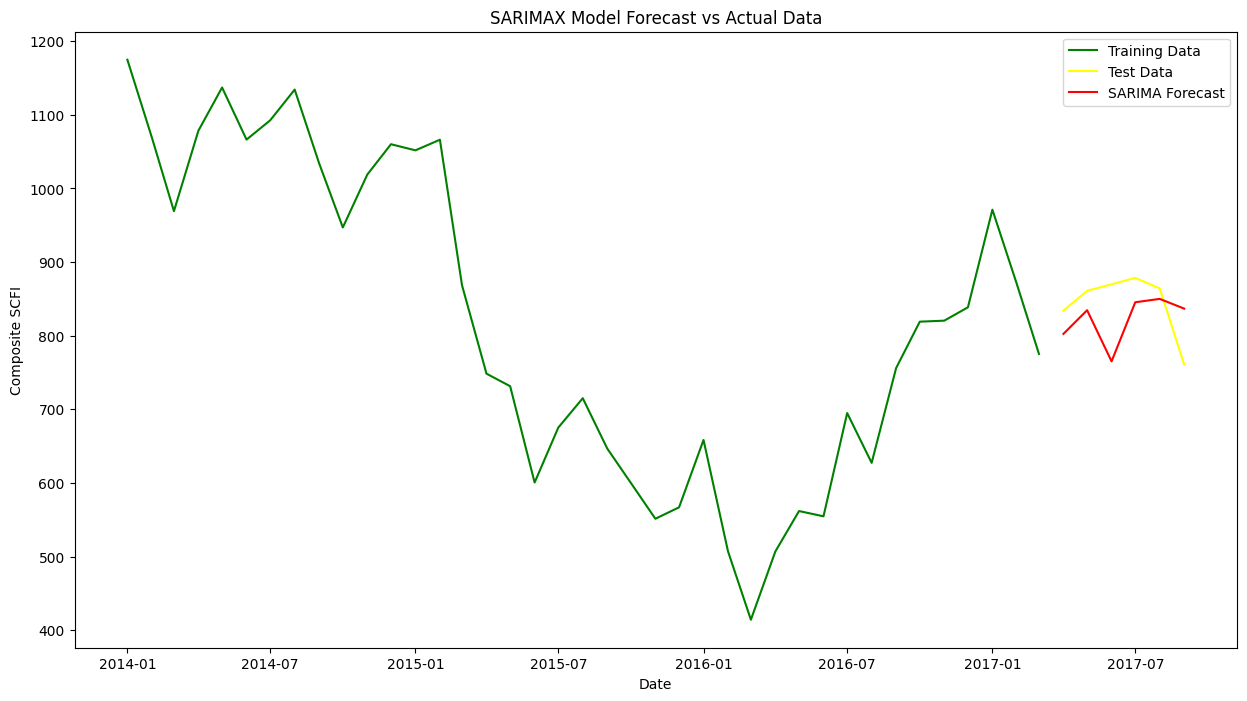

In [43]:
# Plotting the results
plt.figure(figsize=(15, 8))
plt.plot(train.index, train['SCFI_C'], label='Training Data', color='green')
plt.plot(test.index, test['SCFI_C'], label='Test Data', color='yellow')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Composite SCFI')
plt.title('SARIMAX Model Forecast vs Actual Data')
plt.legend()
plt.show()

# 도표 17-8. 다양한 시계열분석 모형 개발 요청

In [44]:
import pandas as pd

# 파일 경로
file_path = '/content/sample_data/시계열분석_복합SCFI_2017.xlsx'

# 데이터 로드
scfi_data = pd.read_excel(file_path)

# 데이터 확인
scfi_data.head()


,YYYYMM,SCFI_C
0,2014-01,1174.866
1,2014-02,1069.362
2,2014-03,969.145
3,2014-04,1078.462
4,2014-05,1137.112


In [45]:
# 날짜 형식으로 변환
scfi_data['YYYYMM'] = pd.to_datetime(scfi_data['YYYYMM'], format='%Y-%m')
scfi_data.sort_values(by='YYYYMM', inplace=True)  # ChatGTP 누락 작성 필요

# 인덱스 설정
scfi_data.set_index('YYYYMM', inplace=True)

# 데이터 확인
scfi_data.head()


,SCFI_C
YYYYMM,
2014-01-01,1174.866
2014-02-01,1069.362
2014-03-01,969.145
2014-04-01,1078.462
2014-05-01,1137.112


# 도표 17-9. 시계열분석 모형별 테스트데이터의 RMSE결과

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 최소자승법(Linear Regression)
# 시간을 독립변수로 설정
time = np.arange(len(scfi_data.index)).reshape(-1, 1)

# Linear Regression 모델 훈련
lin_reg = LinearRegression()
lin_reg.fit(time, scfi_data['SCFI_C'])

# 전체 데이터에 대한 예측
scfi_data['Linear_Prediction'] = lin_reg.predict(time)

# 최소자승법 모델의 RMSE 계산을 위해 테스트 데이터 분리
train_data = scfi_data.iloc[:-6]
test_data = scfi_data.iloc[-6:]

# 테스트 데이터에 대한 예측
time_test = np.arange(len(train_data), len(scfi_data.index)).reshape(-1, 1)
test_data['Linear_Prediction'] = lin_reg.predict(time_test)

# RMSE 계산
rmse_linear = np.sqrt(mean_squared_error(test_data['SCFI_C'], test_data['Linear_Prediction']))

rmse_linear, test_data[['SCFI_C', 'Linear_Prediction']]


<ipython-input-46-7af3ed5f046d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Linear_Prediction'] = lin_reg.predict(time_test)


(172.538938973042,
              SCFI_C  Linear_Prediction
 YYYYMM                                
 2017-04-01  834.060         694.904858
 2017-05-01  860.922         687.354541
 2017-06-01  869.764         679.804224
 2017-07-01  878.540         672.253907
 2017-08-01  864.205         664.703590
 2017-09-01  760.540         657.153273)

# 도표 17-23. [예제 17-2] 이동평균법의 RMSE 계산 파이썬 코드

In [47]:
# 이동평균법(Moving Average)
# 12개월 이동평균
window_size = 12
scfi_data['Moving_Average'] = scfi_data['SCFI_C'].rolling(window=window_size).mean()

# 이동평균법은 특정 시점 이전의 데이터를 사용하기 때문에 첫 window_size-1개의 예측값은 NaN이 됩니다
# 이를 제거하고 테스트 데이터에 대한 예측값 계산
test_data['Moving_Average'] = scfi_data['Moving_Average'].iloc[-6:]

# RMSE 계산
rmse_moving_average = np.sqrt(mean_squared_error(test_data['SCFI_C'], test_data['Moving_Average']))

rmse_moving_average, test_data[['SCFI_C', 'Moving_Average']]


<ipython-input-47-fe5db2acdcb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Moving_Average'] = scfi_data['Moving_Average'].iloc[-6:]


(64.6112995938035,
              SCFI_C  Moving_Average
 YYYYMM                             
 2017-04-01  834.060      760.221917
 2017-05-01  860.922      785.152500
 2017-06-01  869.764      811.415500
 2017-07-01  878.540      826.720000
 2017-08-01  864.205      846.470000
 2017-09-01  760.540      846.854833)

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 지수평활법(Exponential Smoothing)
ses_model = SimpleExpSmoothing(train_data['SCFI_C']).fit(smoothing_level=0.2, optimized=False)
fitted_values = ses_model.fittedvalues
forecast_values = ses_model.forecast(6)
scfi_data['SES'] = pd.concat([fitted_values, forecast_values])

# 테스트 데이터에 대한 예측
test_data['SES'] = scfi_data['SES'].iloc[-6:]

# RMSE 계산
rmse_ses = np.sqrt(mean_squared_error(test_data['SCFI_C'], test_data['SES']))

# 결과 출력
print(f'RMSE for Simple Exponential Smoothing: {rmse_ses}')
print(test_data[['SCFI_C', 'SES']])

RMSE for Simple Exponential Smoothing: 67.04786381841336
             SCFI_C        SES
YYYYMM                        
2017-04-01  834.060  790.88299
2017-05-01  860.922  790.88299
2017-06-01  869.764  790.88299
2017-07-01  878.540  790.88299
2017-08-01  864.205  790.88299
2017-09-01  760.540  790.88299


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-48-6048b5c3206a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SES'] = scfi_data['SES'].iloc[-6:]


In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Holt-Winters 모델
hw_model = ExponentialSmoothing(train_data['SCFI_C'], trend='add', seasonal='add', seasonal_periods=12).fit()
scfi_data['Holt_Winters'] = pd.concat([hw_model.fittedvalues, hw_model.forecast(6)])

# 테스트 데이터에 대한 예측
test_data['Holt_Winters'] = scfi_data['Holt_Winters'].iloc[-6:]

# RMSE 계산
rmse_hw = np.sqrt(mean_squared_error(test_data['SCFI_C'], test_data['Holt_Winters']))

rmse_hw, test_data[['SCFI_C', 'Holt_Winters']]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-49-5bf6f8f2111a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Holt_Winters'] = scfi_data['Holt_Winters'].iloc[-6:]


(56.37982118084708,
              SCFI_C  Holt_Winters
 YYYYMM                           
 2017-04-01  834.060    803.417031
 2017-05-01  860.922    838.309542
 2017-06-01  869.764    770.775769
 2017-07-01  878.540    852.469599
 2017-08-01  864.205    857.906647
 2017-09-01  760.540    844.823959)

In [50]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

# 정상성 검사
adf_test = adfuller(train_data['SCFI_C'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# ARIMA 모델을 위한 p, d, q 값 결정
# 여기서는 간단한 그리드 서치를 사용
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_pdq = None
best_aic = float('inf')
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(train_data['SCFI_C'], order=param)
        results = temp_model.fit()
        print(f"ARIMA{param} - AIC: {results.aic}")

        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

print(f"Best ARIMA Model: ARIMA{best_pdq} with AIC {best_aic}")

# 예측
scfi_data['ARIMA'] = best_model.predict(start=scfi_data.index[0], end=scfi_data.index[-1], typ='levels')

# 테스트 데이터에 대한 예측
test_data['ARIMA'] = scfi_data['ARIMA'].iloc[-6:]

# RMSE 계산
rmse_arima = np.sqrt(mean_squared_error(test_data['SCFI_C'], test_data['ARIMA']))

rmse_arima, test_data[['SCFI_C', 'ARIMA']]


ADF Statistic: -1.8026352379219142
p-value: 0.3791541582442306

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date


ARIMA(0, 0, 0) - AIC: 533.6106266757555


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) - AIC: 499.82528344669464
ARIMA(0, 0, 2) - AIC: 484.3857602172898
ARIMA(0, 1, 0) - AIC: 449.5377077948318
ARIMA(0, 1, 1) - AIC: 451.498709367154
ARIMA(0, 1, 2) - AIC: 451.20317084668454


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA(0, 2, 0) - AIC: 462.06738966600994
ARIMA(0, 2, 1) - AIC: 443.5991502825431
ARIMA(0, 2, 2) - AIC: 445.47772560699013
ARIMA(1, 0, 0) - AIC: 465.69351190039686


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA(1, 0, 1) - AIC: 467.44789824288006
ARIMA(1, 0, 2) - AIC: 467.52466834557123


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA(1, 1, 0) - AIC: 451.5167190368311
ARIMA(1, 1, 1) - AIC: 452.3191593386053
ARIMA(1, 1, 2) - AIC: 452.9958346355211


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA(1, 2, 0) - AIC: 458.0640243228503
ARIMA(1, 2, 1) - AIC: 445.5304260583516


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA(1, 2, 2) - AIC: 446.30055682431026
ARIMA(2, 0, 0) - AIC: 467.56621039718556


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA(2, 0, 1) - AIC: 468.1824328017399


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

ARIMA(2, 0, 2) - AIC: 469.30513288869497
ARIMA(2, 1, 0) - AIC: 451.55237868702267
ARIMA(2, 1, 1) - AIC: 452.1540462078262
ARIMA(2, 1, 2) - AIC: 450.65929428801473


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred

ARIMA(2, 2, 0) - AIC: 447.8162008242716
ARIMA(2, 2, 1) - AIC: 445.361140065889


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA(2, 2, 2) - AIC: 446.18148634065085
Best ARIMA Model: ARIMA(0, 2, 1) with AIC 443.5991502825431


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-50-ca36641ca342>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA'] = scfi_data['ARIMA'].iloc[-6:]


(110.88824470713824,
              SCFI_C       ARIMA
 YYYYMM                         
 2017-04-01  834.060  765.086430
 2017-05-01  860.922  754.998860
 2017-06-01  869.764  744.911289
 2017-07-01  878.540  734.823719
 2017-08-01  864.205  724.736149
 2017-09-01  760.540  714.648579)

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# SARIMA 모델을 위한 계절적 P, D, Q 값과 비계절적 p, d, q 값 결정
p = d = q = P = D = Q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

best_seasonal_pdq = None
best_sarima_aic = float('inf')
best_sarima_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            temp_model = SARIMAX(train_data['SCFI_C'],
                                 order=param,
                                 seasonal_order=seasonal_param,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()
            print(f"SARIMA{param}x{seasonal_param} - AIC: {results.aic}")

            if results.aic < best_sarima_aic:
                best_sarima_aic = results.aic
                best_seasonal_pdq = (param, seasonal_param)
                best_sarima_model = results
        except:
            continue

print(f"Best SARIMA Model: SARIMA{best_seasonal_pdq} with AIC {best_sarima_aic}")

# 예측
scfi_data['SARIMA'] = best_sarima_model.predict(start=scfi_data.index[0], end=scfi_data.index[-1], typ='levels')

# 테스트 데이터에 대한 예측
test_data['SARIMA'] = scfi_data['SARIMA'].iloc[-6:]

# RMSE 계산
rmse_sarima = np.sqrt(mean_squared_error(test_data['SCFI_C'], test_data['SARIMA']))

rmse_sarima, test_data[['SCFI_C', 'SARIMA']]


SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 621.3393070229007


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 1006.2835288605226
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 378.14309065200547


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 199.9274035154989
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: 380.2565084492114
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: 357.41028054702673
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 215.81936886798832


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters excep

SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 200.65867391526132
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC: 561.4904652959484


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC: 1955.6724679541044
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC: 340.022015319832
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 169.53957564188633
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC: 357.1891539395883


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC: 326.1370782068452
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC: 202.8259882221769


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters excep

SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC: 170.43054789671052
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 437.2980631301672
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 1038.6945568875212
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: 305.97360643513883


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 158.77714204655774
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 310.656212865646
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 300.8021220776717
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC: 171.34801246220297


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC: 160.6326470497664
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 427.19138394915757


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 1091.282597789998
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC: 294.4114620394887
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: 149.13136104167629
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC: 312.5444335852359
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC: 288.54377773752515
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC: 173.3415542462138


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC: 151.0264187409698
SARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC: 450.14604977691437
SARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC: 916.3963298899959


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC: 320.1665744868456
SARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC: 170.56563594162688
SARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC: 312.2825168382691


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No freq

SARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC: 313.9916529484372
SARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC: 171.01780188745695


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters excep

SARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC: 171.55195595497145
SARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC: 440.4376047411861


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC: 1057.7268828141769
SARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC: 308.6946440224845
SARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC: 157.3213971428341
SARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC: 314.1278574377811


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC: 304.3481473337671
SARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC: 172.92672083216823


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters excep

SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC: 156.23630560463454
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC: 439.2707405094981
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC: 1231.682020842939


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC: 307.2513156074659
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC: 160.7474027214659


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No freq

SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC: 301.39473353762753
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC: 302.5585330322738


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC: 161.2316407938375


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC: 162.63226030324884
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC: 428.6852645487952


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC: 1980.5132863533297


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC: 295.35693028713627


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC: 150.90598676365852


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC: 302.622906561575


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC: 290.4754271318054


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC: 163.09583989299708


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC: 152.68581724866607
Best SARIMA Model: SARIMA((0, 1, 1), (0, 1, 1, 12)) with AIC 149.13136104167629


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-51-609e5f7b2e2c>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SARIMA'] = scfi_data['SARIMA'].iloc[-6:]


(120.19907071997821,
              SCFI_C       SARIMA
 YYYYMM                          
 2017-04-01  834.060   842.071201
 2017-05-01  860.922   885.759546
 2017-06-01  869.764   856.725015
 2017-07-01  878.540   982.450021
 2017-08-01  864.205   935.780312
 2017-09-01  760.540  1024.955362)

In [52]:
# 전체 데이터에 대한 각 모델의 예측 결과 저장
all_predictions = scfi_data.drop(columns=['SCFI_C'])
all_predictions_path = '/content/sample_data/all_model_predictions.xlsx'
all_predictions.to_excel(all_predictions_path)

# 테스트 데이터에 대한 각 모델의 예측 결과 저장
test_predictions = test_data.drop(columns=['SCFI_C'])
test_predictions_path = '/content/sample_data/test_data_predictions.xlsx'
test_predictions.to_excel(test_predictions_path)

# 각 모델별 RMSE 저장
rmse_values = {
    'Model': ['Linear Regression', 'Moving Average', 'Exponential Smoothing', 'Holt-Winters', 'ARIMA', 'SARIMA'],
    'RMSE': [rmse_linear, rmse_moving_average, rmse_ses, rmse_hw, rmse_arima, rmse_sarima]
}
rmse_df = pd.DataFrame(rmse_values)
rmse_path = '/content/sample_data/model_rmse.xlsx'
rmse_df.to_excel(rmse_path, index=False)

all_predictions_path, test_predictions_path, rmse_path


('/content/sample_data/all_model_predictions.xlsx',
 '/content/sample_data/test_data_predictions.xlsx',
 '/content/sample_data/model_rmse.xlsx')

In [53]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import pandas as pd

# 지수평활법(Exponential Smoothing)
ses_model = SimpleExpSmoothing(train_data['SCFI_C']).fit(smoothing_level=0.2, optimized=False)
fitted_values = ses_model.fittedvalues
forecast_values = ses_model.forecast(6)
scfi_data['SES'] = pd.concat([fitted_values, forecast_values])

# 테스트 데이터에 대한 예측
test_data['SES'] = scfi_data['SES'].iloc[-6:]

# RMSE 계산
rmse_ses = np.sqrt(mean_squared_error(test_data['SCFI_C'], test_data['SES']))

# 결과 출력
print(f'RMSE for Simple Exponential Smoothing: {rmse_ses}')
print(test_data[['SCFI_C', 'SES']])

RMSE for Simple Exponential Smoothing: 67.04786381841336
             SCFI_C        SES
YYYYMM                        
2017-04-01  834.060  790.88299
2017-05-01  860.922  790.88299
2017-06-01  869.764  790.88299
2017-07-01  878.540  790.88299
2017-08-01  864.205  790.88299
2017-09-01  760.540  790.88299


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-67dd031f9980>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SES'] = scfi_data['SES'].iloc[-6:]


# 도표 17-11. 시계열분석 모형 예측결과의 시각화 비교

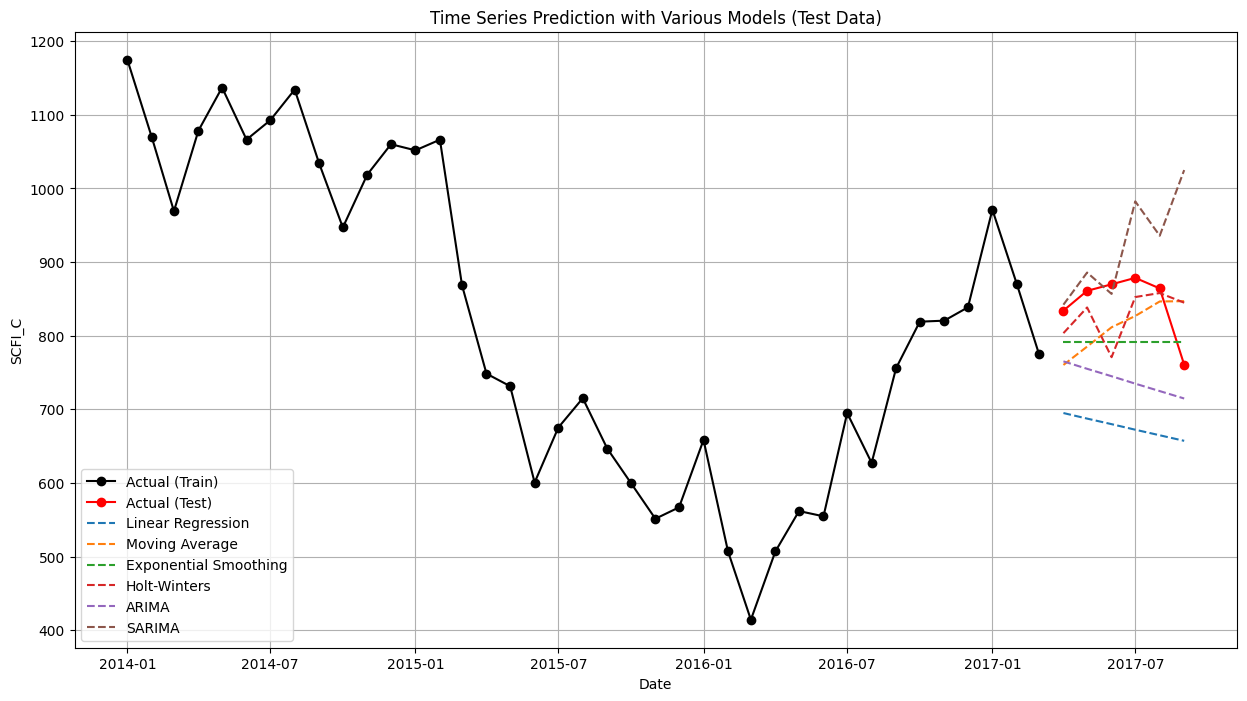

In [54]:
import matplotlib.pyplot as plt

# 훈련 데이터 및 테스트 데이터에 대한 각 모델의 예측 결과를 하나의 그래프로 표현
plt.figure(figsize=(15, 8))

# 실제 데이터
plt.plot(train_data.index, train_data['SCFI_C'], label='Actual (Train)', color='black', marker='o')
plt.plot(test_data.index, test_data['SCFI_C'], label='Actual (Test)', color='red', marker='o')

# 각 모델의 예측 결과 (테스트 데이터에 대해서만)
plt.plot(test_data.index, test_data['Linear_Prediction'], label='Linear Regression', linestyle='--')
plt.plot(test_data.index, test_data['Moving_Average'], label='Moving Average', linestyle='--')
plt.plot(test_data.index, test_data['SES'], label='Exponential Smoothing', linestyle='--')
plt.plot(test_data.index, test_data['Holt_Winters'], label='Holt-Winters', linestyle='--')
plt.plot(test_data.index, test_data['ARIMA'], label='ARIMA', linestyle='--')
plt.plot(test_data.index, test_data['SARIMA'], label='SARIMA', linestyle='--')

plt.title('Time Series Prediction with Various Models (Test Data)')
plt.xlabel('Date')
plt.ylabel('SCFI_C')
plt.legend()
plt.grid(True)
plt.show()
